In [107]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [108]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [109]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

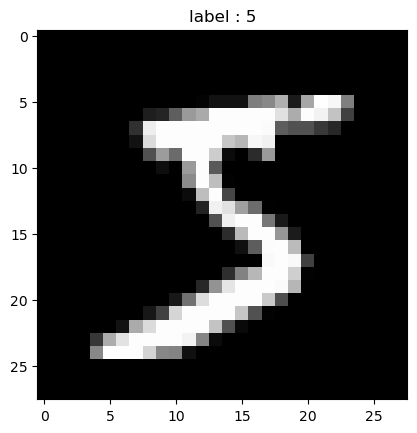

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

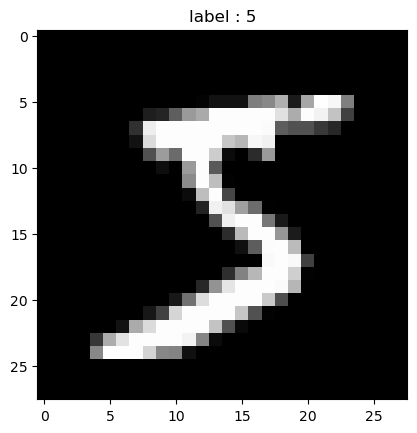

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [111]:
index = 0
image = X_train[index].reshape(28, 28)
image = image.astype(float)  # Convert to float type
image -= 105.35  # Intentionally try to create a negative decimal value
plt.imshow(image, 'gray')

plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # Check the value

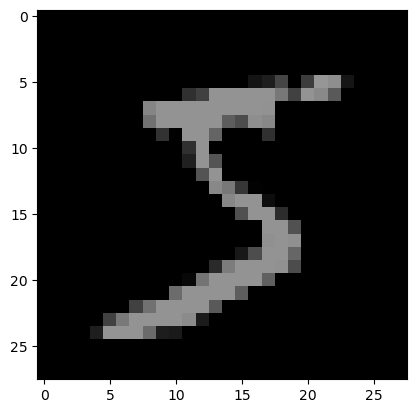

In [112]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

In [113]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [114]:
from sklearn.preprocessing import OneHotEncoder

# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print shapes for verification
print(X_train.shape)  # (48000, 784)
print(X_val.shape)  # (12000, 784)
print(y_train.shape)  # (48000,)
print(y_val.shape)  # (12000,)

# One-hot encoding of the labels after splitting
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

# Print shapes and types for verification
print(y_train_one_hot.shape)  # (48000, 10)
print(y_val_one_hot.shape)  # (12000, 10)
print(y_test_one_hot.shape)  # (10000, 10)
print(y_train_one_hot.dtype)  # float64


(48000, 784)
(12000, 784)
(48000,)
(12000,)
(48000, 10)
(12000, 10)
(10000, 10)
float64


In [115]:
class GetMiniBatch:
    """
    Iterator to get a mini-batch

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Training data
    y : ndarray, shape (n_samples, 1)
        Correct answer value
    batch_size : int, optional (default=20)
        Batch size
    seed : int, optional (default=0)
        NumPy random seed
    """
    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)
        self._current = 0

    def __len__(self):
        return self._stop

    def __getitem__(self, index):
        p0 = index * self.batch_size
        p1 = (index + 1) * self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._current = 0
        return self

    def __next__(self):
        if self._current >= self._stop:
            raise StopIteration()
        result = self.__getitem__(self._current)
        self._current += 1
        return result


In [116]:
import numpy as np
from sklearn.metrics import accuracy_score

class ScratchSimpleNeuralNetworkClassifier:
    def __init__(self, n_epochs=50, n_features=784, n_nodes1=400, n_nodes2=200, n_output=10, sigma=0.01, n_batch=100, activation_function_key='tanh', lr=0.01, verbose=False):
        self.n_epochs = n_epochs
        self.n_features = n_features
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.n_output = n_output
        self.sigma = sigma
        self.n_batch = n_batch
        self.activation_function_key = activation_function_key
        self.lr = lr
        self.verbose = verbose
        self._initialize_weights()

    def _initialize_weights(self):
        self.W1 = self.sigma * np.random.randn(self.n_features, self.n_nodes1)
        self.b1 = np.zeros(self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.b2 = np.zeros(self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, self.n_output)
        self.b3 = np.zeros(self.n_output)

    def _activation_function(self, X):
        if self.activation_function_key == 'sigmoid':
            return 1 / (1 + np.exp(-X))
        elif self.activation_function_key == 'tanh':
            return np.tanh(X)

    def _softmax(self, X):
        exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
        return exp_X / np.sum(exp_X, axis=1, keepdims=True)

    def _loss_function(self, y_pred, y_true):
        delta = 1e-7
        return -np.mean(y_true * np.log(y_pred + delta))

    def _gradient_descent(self, X, y_pred, y_true):
        delta_output = (y_pred - y_true) / self.n_batch
        delta_b3 = np.sum(delta_output, axis=0)
        delta_W3 = np.dot(self.z2.T, delta_output)
        delta_z2 = np.dot(delta_output, self.W3.T)

        self.W3 -= self.lr * delta_W3
        self.b3 -= self.lr * delta_b3

        if self.activation_function_key == 'sigmoid':
            delta_a2 = delta_z2 * (1 - self.z2) * self.z2
        elif self.activation_function_key == 'tanh':
            delta_a2 = delta_z2 * (1 - np.tanh(self.z2) ** 2)

        delta_b2 = np.sum(delta_a2, axis=0)
        delta_W2 = np.dot(self.z1.T, delta_a2)
        delta_z1 = np.dot(delta_a2, self.W2.T)

        self.W2 -= self.lr * delta_W2
        self.b2 -= self.lr * delta_b2

        if self.activation_function_key == 'sigmoid':
            delta_a1 = delta_z1 * (1 - self.z1) * self.z1
        elif self.activation_function_key == 'tanh':
            delta_a1 = delta_z1 * (1 - np.tanh(self.z1) ** 2)

        delta_b1 = np.sum(delta_a1, axis=0)
        delta_W1 = np.dot(X.T, delta_a1)

        self.W1 -= self.lr * delta_W1
        self.b1 -= self.lr * delta_b1

    def fit(self, X, y, X_val=None, y_val=None):
        self._initialize_weights()

        self.log_loss = []
        self.log_loss_val = []
        self.log_acc = []
        self.log_acc_val = []

        for epoch in range(self.n_epochs):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.n_batch)
            total_loss = 0
            true_y = np.array([])
            pred_y = np.array([])

            for mini_X_train, mini_y_train in get_mini_batch:
                self.z1 = self._activation_function(np.dot(mini_X_train, self.W1) + self.b1)
                self.z2 = self._activation_function(np.dot(self.z1, self.W2) + self.b2)
                output = self._softmax(np.dot(self.z2, self.W3) + self.b3)

                self._gradient_descent(mini_X_train, output, mini_y_train)

                true_y = np.concatenate([true_y, np.argmax(mini_y_train, axis=1)])
                pred_y = np.concatenate([pred_y, np.argmax(output, axis=1)])

                total_loss += self._loss_function(output, mini_y_train)

            self.log_loss.append(total_loss / len(get_mini_batch))
            acc = accuracy_score(true_y, pred_y)
            self.log_acc.append(acc)

            if X_val is not None and y_val is not None:
                self.z1_val = self._activation_function(np.dot(X_val, self.W1) + self.b1)
                self.z2_val = self._activation_function(np.dot(self.z1_val, self.W2) + self.b2)
                output_val = self._softmax(np.dot(self.z2_val, self.W3) + self.b3)

                loss_val = self._loss_function(output_val, y_val)
                self.log_loss_val.append(loss_val)
                acc_val = accuracy_score(np.argmax(y_val, axis=1), np.argmax(output_val, axis=1))
                self.log_acc_val.append(acc_val)

            if self.verbose:
                print(f'Epoch: {epoch + 1}/{self.n_epochs}, Loss: {total_loss / len(get_mini_batch):.3f}, Accuracy: {acc:.3f}')
                

    def predict(self, X):
        self.z1_pred = self._activation_function(np.dot(X, self.W1) + self.b1)
        self.z2_pred = self._activation_function(np.dot(self.z1_pred, self.W2) + self.b2)
        return np.argmax(np.dot(self.z2_pred, self.W3) + self.b3, axis=1)

## Problem Six: Learning and Estimation

In [117]:
clf = ScratchSimpleNeuralNetworkClassifier(n_epochs=30, n_features=784,
                                           n_nodes1=400, n_nodes2=200, n_output=10,
                                           activation_function_key='tanh',
                                           lr=0.01, n_batch=100, verbose=True)
clf.fit(X_train, y_train_one_hot, X_val=X_val, y_val=y_val_one_hot)
y_pred = clf.predict(X_val)

Epoch: 1/30, Loss: 0.229, Accuracy: 0.190
Epoch: 2/30, Loss: 0.224, Accuracy: 0.348
Epoch: 3/30, Loss: 0.173, Accuracy: 0.452
Epoch: 4/30, Loss: 0.108, Accuracy: 0.667
Epoch: 5/30, Loss: 0.076, Accuracy: 0.777
Epoch: 6/30, Loss: 0.062, Accuracy: 0.817
Epoch: 7/30, Loss: 0.054, Accuracy: 0.843
Epoch: 8/30, Loss: 0.049, Accuracy: 0.860
Epoch: 9/30, Loss: 0.045, Accuracy: 0.871
Epoch: 10/30, Loss: 0.042, Accuracy: 0.879
Epoch: 11/30, Loss: 0.040, Accuracy: 0.885
Epoch: 12/30, Loss: 0.039, Accuracy: 0.890
Epoch: 13/30, Loss: 0.037, Accuracy: 0.894
Epoch: 14/30, Loss: 0.036, Accuracy: 0.897
Epoch: 15/30, Loss: 0.036, Accuracy: 0.899
Epoch: 16/30, Loss: 0.035, Accuracy: 0.900
Epoch: 17/30, Loss: 0.034, Accuracy: 0.903
Epoch: 18/30, Loss: 0.033, Accuracy: 0.905
Epoch: 19/30, Loss: 0.033, Accuracy: 0.907
Epoch: 20/30, Loss: 0.032, Accuracy: 0.909
Epoch: 21/30, Loss: 0.032, Accuracy: 0.910
Epoch: 22/30, Loss: 0.031, Accuracy: 0.912
Epoch: 23/30, Loss: 0.031, Accuracy: 0.913
Epoch: 24/30, Loss: 

## Problem Seven: Plotting the learning curve

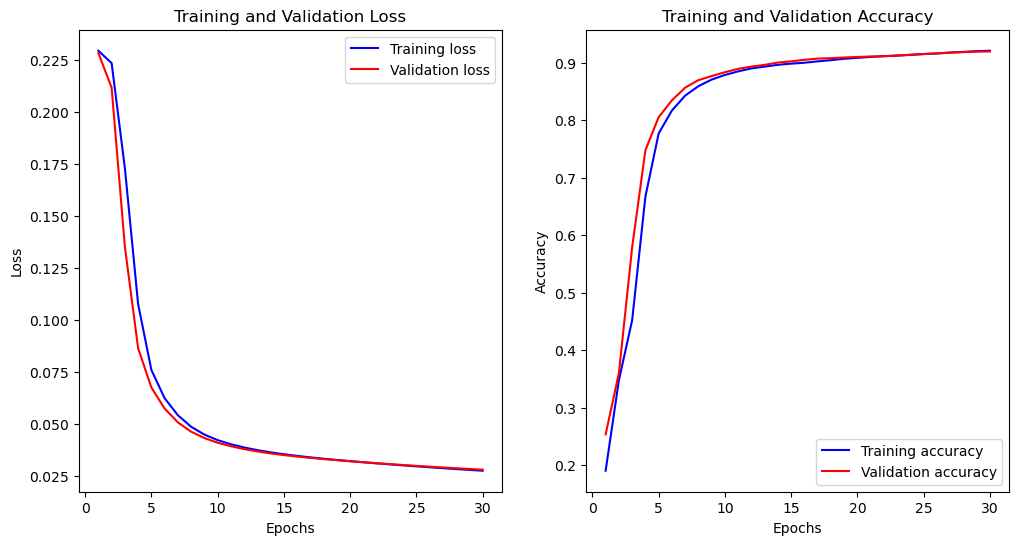

In [118]:
# Visualize the learning curve
def plot_learning_curve(log_loss, log_loss_val, log_acc=None, log_acc_val=None):
    epochs = range(1, len(log_loss) + 1)
    
    plt.figure(figsize=(12, 6))

    # Plotting loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, log_loss, 'b', label='Training loss')
    plt.plot(epochs, log_loss_val, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plotting accuracy
    if log_acc and log_acc_val:
        plt.subplot(1, 2, 2)
        plt.plot(epochs, log_acc, 'b', label='Training accuracy')
        plt.plot(epochs, log_acc_val, 'r', label='Validation accuracy')
        plt.title('Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

    plt.show()

# Call the function to plot learning curve
plot_learning_curve(clf.log_loss, clf.log_loss_val, clf.log_acc, clf.log_acc_val)

The graphs show a decrease in the validation loss and an increase in the accuracy as the model trains per epoch, this proves that our model is learning.

## Problem Eight: (Advance Assignment) Confirmation of Misclassification

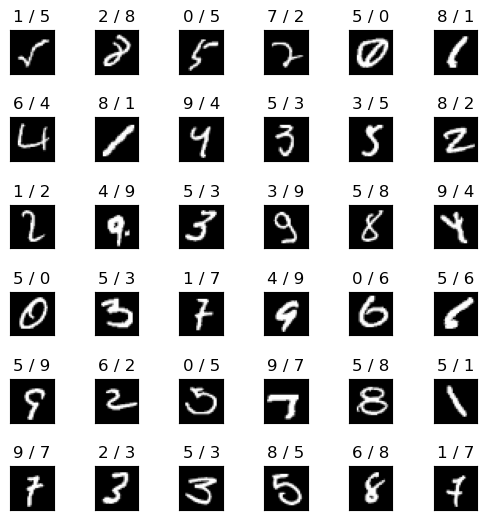

In [119]:
num = 36 # How many to display

true_false = y_pred==y_val
false_list = np.where(true_false==False)[0].astype(int)

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
    ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')